In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('heights.csv')
X = data[['mother_height']].values
y = data['daughter_height'].values

# Standardize
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Split data
def train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_index = int(len(X) * (1 - test_size))
    train_indices, test_indices = indices[:split_index], indices[split_index:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Gradient Descent
def gradient_descent(X, y, learning_rate=0.001, epochs=1000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.random.randn(2, 1)
    y = y.reshape(-1, 1)
    errors = []
    
    for epoch in range(epochs):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= learning_rate * gradients
        error = np.mean((y - X_b.dot(theta))**2)
        errors.append(error)
        
    return theta, errors

learning_rate = 0.001
epochs = 1000

theta, errors = gradient_descent(X_train, y_train, learning_rate, epochs)
intercept, slope = theta[0][0], theta[1][0]

print(f"Gradient Descent Coefficients:\nIntercept: {intercept}\nSlope: {slope}")

# Compare with sklearn
model = LinearRegression().fit(X_train, y_train)
print(f"Sklearn Coefficients:\nIntercept: {model.intercept_[0]}\nSlope: {model.coef_[0]}")

# Predict and evaluate
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]
y_test_pred = X_test_b.dot(theta)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Plotting
plt.figure(figsize=(14, 6))

# Plot data and regression line
plt.subplot(1, 2, 1)
plt.scatter(data['mother_height'], data['daughter_height'], color='blue', label='Data Points')

X_line = np.linspace(data['mother_height'].min(), data['mother_height'].max(), 100).reshape(-1, 1)
X_line_standardized = scaler.transform(X_line)
X_line_b = np.c_[np.ones((X_line_standardized.shape[0], 1)), X_line_standardized]
y_line = X_line_b.dot(theta)

plt.plot(X_line, y_line, color='red', label='Line of Best Fit')
plt.xlabel('Mother Height')
plt.ylabel('Daughter Height')
plt.title('Height vs Line of Best Fit')
plt.legend()

# Plot error vs iteration
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), errors, color='green')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Error vs Iteration')

plt.tight_layout()
plt.show()

# Predict daughter height for new mother height
new_mother_height = np.array([[63]])
new_mother_height_standardized = scaler.transform(new_mother_height)
new_mother_height_b = np.c_[np.ones((new_mother_height_standardized.shape[0], 1)), new_mother_height_standardized]
predicted_daughter_height = new_mother_height_b.dot(theta)[0][0]
print(f"Predicted Daughter's Height for Mother Height {new_mother_height[0][0]}: {predicted_daughter_height}")


Gradient Descent Coefficients:
Intercept: 61.44810748515938
Slope: 5.300439610149634


IndexError: invalid index to scalar variable.

Sklearn Coefficients: [1.33558319]
Sklearn Intercept: 0.0
Accuracy: 1.0
Probability of passing with 3.5 hours: 0.4130373007834765
Probability of passing with 7.5 hours: 0.7415940326348259


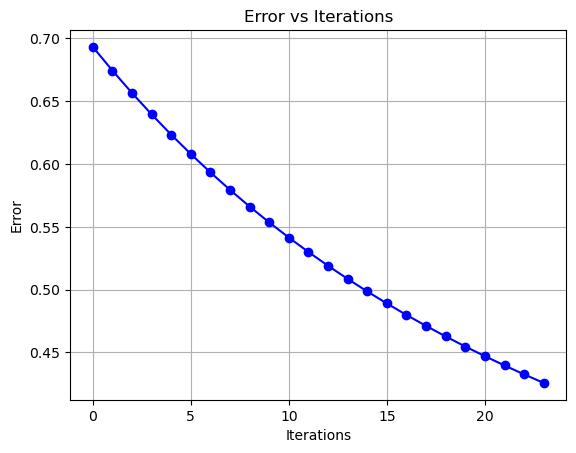

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data
hours_of_study = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
pass_status = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent
def gradient_descent(X, y, alpha, epochs):
    m = len(y)
    theta = np.zeros(X.shape[1])
    intercept = 0
    errors = []
    
    for epoch in range(epochs):
        z = np.dot(X, theta) + intercept
        predictions = sigmoid(z)
        error = - (1/m) * np.sum(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
        errors.append(error)
        gradient_theta = (1/m) * np.dot(X.T, (predictions - y))
        gradient_intercept = (1/m) * np.sum(predictions - y)
        theta -= alpha * gradient_theta
        intercept -= alpha * gradient_intercept
    
    return theta, intercept, errors

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(hours_of_study)

# Parameters
alpha = 0.1
epochs = 24
theta, intercept, errors = gradient_descent(X_scaled, pass_status, alpha, epochs)

# Sklearn comparison
model = LogisticRegression().fit(X_scaled, pass_status)
print("Sklearn Coefficients:", model.coef_[0])
print("Sklearn Intercept:", model.intercept_[0])

# Predictions
def predict_probabilities(X, theta, intercept):
    z = np.dot(X, theta) + intercept
    return sigmoid(z)

def predict_class(probabilities):
    return (probabilities >= 0.5).astype(int)

probabilities = predict_probabilities(X_scaled, theta, intercept)
predictions = predict_class(probabilities)
accuracy = accuracy_score(pass_status, predictions)
print("Accuracy:", accuracy)

# Test probabilities
test_hours = np.array([3.5, 7.5]).reshape(-1, 1)
test_hours_scaled = scaler.transform(test_hours)
test_probabilities = predict_probabilities(test_hours_scaled, theta, intercept)
print("Probability of passing with 3.5 hours:", test_probabilities[0])
print("Probability of passing with 7.5 hours:", test_probabilities[1])

# Plotting error vs iteration
plt.plot(range(epochs), errors, color='blue', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error vs Iterations')
plt.grid(True)
plt.show()


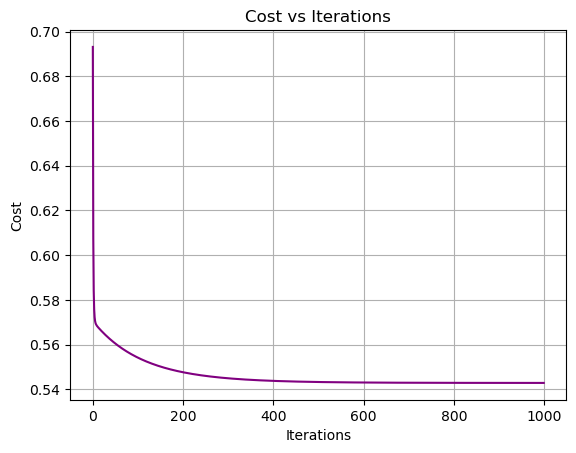

Test Probabilities: [0.36108618 0.06433851]
Predicted Classes: [0 0]


In [5]:
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt

# Data
X1 = np.array([[4, 1], [8, -14], [1, 0], [3, 2], [1, 4], [6, 7]])
y1 = np.array([1, 0, 1, 0, 0, 0])

# Sigmoid function
def sigmoid(z1):
    return expit(z1)

# Cost function
def cost_function(X1, y1, theta, intercept):
    m1 = len(y1)
    z1 = np.dot(X1, theta) + intercept
    predictions = sigmoid(z1)
    cost = - (1/m1) * np.sum(y1 * np.log(predictions + 1e-10) + (1 - y1) * np.log(1 - predictions + 1e-10))
    return cost

# Gradient Descent
def gradient_descent(X1, y1, alpha, epochs):
    m1 = len(y1)
    theta = np.zeros(X1.shape[1])
    intercept = 0
    errors = []
    
    for epoch in range(epochs):
        z1 = np.dot(X1, theta) + intercept
        predictions = sigmoid(z1)
        error = cost_function(X1, y1, theta, intercept)
        errors.append(error)
        gradient_theta = (1/m1) * np.dot(X1.T, (predictions - y1))
        gradient_intercept = (1/m1) * np.sum(predictions - y1)
        theta -= alpha * gradient_theta
        intercept -= alpha * gradient_intercept
    
    return theta, intercept, errors

# Parameters
alpha = 0.1
epochs = 1000
theta, intercept, errors = gradient_descent(X1, y1, alpha, epochs)

# Plotting cost vs iterations
plt.plot(range(epochs), errors, color='purple')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.grid(True)
plt.show()

# Test predictions
test_hours = np.array([[3, 1], [7, 2]])
test_probabilities = sigmoid(np.dot(test_hours, theta) + intercept)
print("Test Probabilities:", test_probabilities)
print("Predicted Classes:", (test_probabilities >= 0.5).astype(int))
